In [ ]:
!pip install plotly
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
!pip install finance-datareader
import FinanceDataReader as fdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
samsung = fdr.DataReader('005930', '2018', '2023')
samsung.to_csv('samsung_price.csv')


In [ ]:
sam1 = pd.read_csv('samsung_price.csv')

In [ ]:
sam1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [ ]:
from prophet import Prophet

samsung_train = sam1[['Date', 'Close']]
samsung_train = samsung_train.rename(columns={"Date": "ds", "Close": "y"})
m = Prophet()
m.fit(samsung_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8f_ewk5t/inkc9mnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8f_ewk5t/d2kt4is1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65276', 'data', 'file=/tmp/tmp8f_ewk5t/inkc9mnc.json', 'init=/tmp/tmp8f_ewk5t/d2kt4is1.json', 'output', 'file=/tmp/tmp8f_ewk5t/prophet_model3my9t96n/prophet_model-20230513100812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:08:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

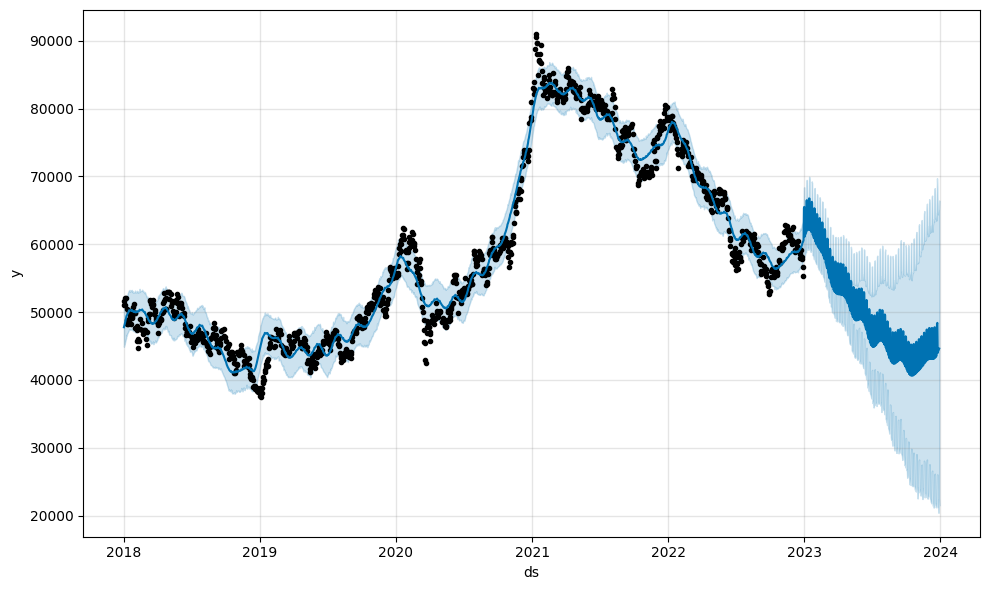

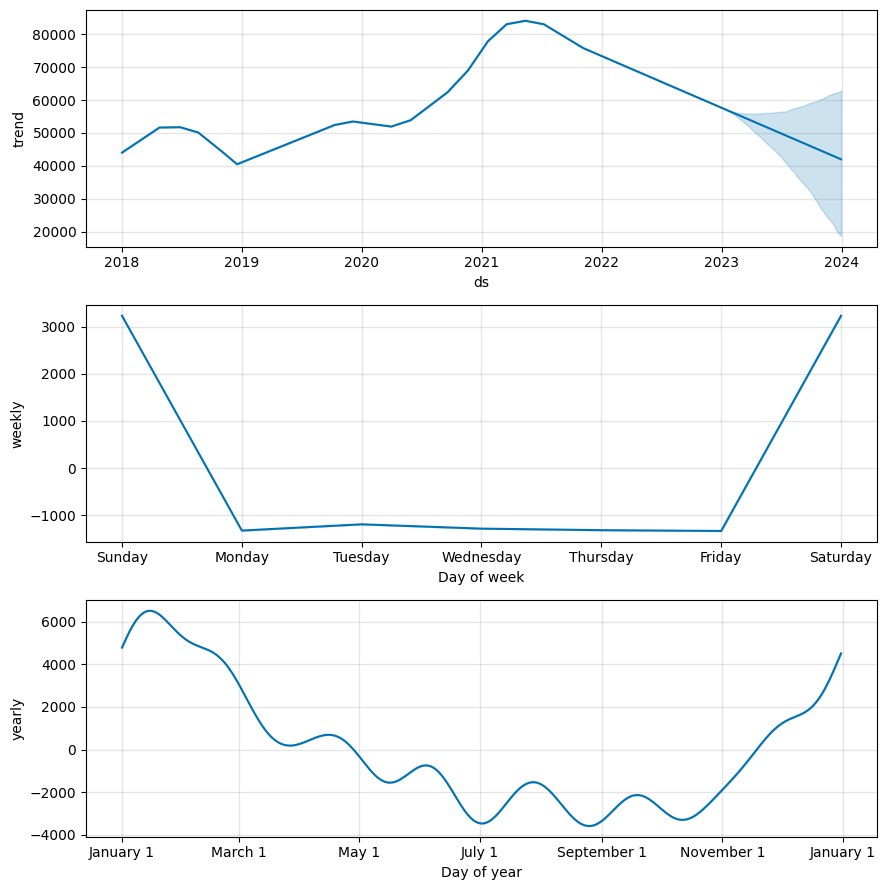

In [ ]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

# 새 섹션